Pulling data from the [BLS](https://www.bls.gov/) Website. 

In [3]:
import pandas as pd 
import json 
import requests 
from IPython.display import display
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.api import OLS
from tqdm import tqdm 

import seaborn as sns 


BLS_KEY = "07b1872f1c8e433fa3ab3420bb243d36"

In [4]:
def clean_bls(lod, d):
    name_map = {} # Creates a dictionary with {name: seriesID}
    for x,y in d.items():
        name_map[y] = x

    out = []
    for i in tqdm(range(len(lod))):
        col_name = lod[i]['seriesID']
        data = pd.DataFrame.from_dict(lod[i]['data'])
        if 'periodName' not in data.columns:
            pass
        else:
            data['Date'] = data[['periodName', 'year']].agg('-'.join, axis=1)
            data.rename(columns = {'value': name_map[col_name]}, inplace = True)
            data.index = pd.to_datetime(data['Date'])
            data[col_name] = data[name_map[col_name]].astype(float)
            out.append(data[name_map[col_name]])
    return pd.concat(out, axis = 1)

def bls_helper(d, startyear = "2005", endyear= "2022"):
    """
    Enter a dictionary with series id as item and Name of series as the key, API wil connect and return json response 
    """
    name_map = {}
    for x,y in d.items():
        name_map[y] = x
    
    bls_series = []
    for x,y in d.items():
        bls_series.append(y)
    
    headers = {'Content-type': 'application/json'}
    data = json.dumps({'seriesid':bls_series, 'startyear':startyear, 'endyear':endyear, 'registrationkey':BLS_KEY})
    p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
    json_data = json.loads(p.text)
    p.close()
    lod = json_data['Results']['series']
    return clean_bls(lod, d)

In [5]:
from BLS_IDS import PPI_industry_data, CPI, FoodAndGas, Layoff_events,Employment,Productivity, ts_analysis

In [6]:
#cpi_df, cpi_json = bls_helper(CPI)
#ppi_df, ppi_json = bls_helper(PPI_industry_data)
#food_df, food_json = bls_helper(FoodAndGas)
#layoffs_df, layoff_json = bls_helper(Layoff_events)
#employment_df = bls_helper(Employment)
#porductivity_df = bls_helper(Productivity)

#employment_df.to_csv('data/employment.csv')
#porductivity_df.to_csv('data/productivity.csv')
#ppi_df.to_csv('data/PPI.csv')
#cpi_df.to_csv('data/CPI.csv')
#food_df.to_csv('data/FoodandGas.csv')
#layoffs_df.to_csv('data/Layoff.csv')

In [19]:
employment_df = pd.read_csv('data/employment.csv', index_col = 'Date')
#productivity_df = pd.read_csv('data/poductivity.csv')
cpi_df = pd.read_csv('data/CPI.csv', parse_dates= True, index_col='Date' )
ppi_df= pd.read_csv('data/PPI.csv', parse_dates= True, index_col='Date' )
food_df = pd.read_csv('data/FoodandGas.csv', parse_dates= True, index_col='Date' )
layoffs_df = pd.read_csv('data/Layoff.csv', parse_dates= True, index_col='Date' )

In [15]:
# Fix columns for the data. 
'''emp_cols = employment_df.columns.to_list()[1:]
# Make the column names shorter 
for i in range(len(emp_cols)):
    # remove the word seasonally adjusted or (seasonally adjusted)
    emp_cols[i] = emp_cols[i].lower().replace(' (seasonally adjusted)', '')
    emp_cols[i] = emp_cols[i].lower().replace(' seasonally adjusted', '')
    # remove special characters
    emp_cols[i] = emp_cols[i].replace(':', '')
    # remove the word total 
    emp_cols[i] = emp_cols[i].lower().replace(' total', '')
    # replace space with underscore
    emp_cols[i] = emp_cols[i].lower().replace(' ', '_')
'''


In [21]:
employment_df.total_nonfarm_employment

Date
2005-01-01    132774
2005-02-01    133032
2005-03-01    133156
2005-04-01    133518
2005-05-01    133690
               ...  
2022-05-01    151610
2022-06-01    151903
2022-07-01    152440
2022-08-01    152755
2022-09-01    153018
Name: total_nonfarm_employment, Length: 213, dtype: int64

In [ ]:
for x in cpi_df: cpi_df[x] = cpi_df[x].astype(float)
for x in food_df: food_df[x] = food_df[x].astype(float)
#cpi_df.to_csv('data/CPI.csv')
#food_df.to_csv('data/FoodandGas.csv')

In [ ]:
cpi_df.pct_change().dropna().to_csv('CPI_change.csv')

In [ ]:
ppi_df.sort_index().pct_change().tail(2).T * 100

Date,2022-06-01,2022-07-01
Total manufacturing industries,2.435507,-2.007777
Electric power distribution,8.649044,-0.179109
Fruit and vegetable canning,-0.624955,2.011474
Petroleum lubricating oil & grease mfg,5.330369,2.931441
Industrial gas manufacturing,0.685077,0.042738
Chemical mfg,1.359848,0.025858
Carbon black,3.215120,3.907250
"All other basic organic chemical mfg, primary products",2.380727,2.732819
Plastics material and resins manufacturing,1.137445,-1.252651
"Synthetic rubber mfg, primary products",2.008964,3.937011


In [ ]:
#PPI Data
def yoy_change(df):
    return df.groupby(df.index.month).pct_change().dropna() #YoY Change
    
def heat_map(pdf):
    pdf.index = pd.to_datetime(pdf.index)
    sns.set(rc = {'figure.figsize':(28,9)})
    color_map = sns.diverging_palette(130,13, as_cmap=True)
    hmap = sns.heatmap(pdf.T * 100,cmap= color_map , center = 0, annot = True,  vmin=-10, vmax=20, linewidths=1, linecolor='black').set_xticklabels([x.strftime('%Y-%m-%d') for x in pdf.index], rotation = 0)


In [ ]:
def regressionModel(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
    predictions = lm.predict(X_test)
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('R^2: ',metrics.explained_variance_score(y_test, predictions) )
    
    return OLS(y_test, predictions).fit().summary()


In [ ]:
yoy_change(food_df['2020-01-01':]).tail().T * 100

Date,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01
Bacon,22.827968,23.086124,19.420756,16.041601,10.989505
Bananas,6.440678,8.080808,5.463576,7.000000,7.563025
Bread,2.667534,5.307995,6.754967,6.287227,11.986755
Chicken,3.095389,11.730395,18.415842,22.745626,23.880597
Coffee,12.283330,15.821023,16.351010,27.792378,25.798046
ChoclateChipCookies,9.210526,4.616549,5.965981,12.092560,12.266470
Eggs,25.547902,25.907692,55.555556,76.184615,64.859927
Flour,-2.727273,2.752294,4.118993,3.872437,39.887640
Milk,15.053444,16.995221,16.391065,20.217329,16.755693
Oranges,9.386828,16.903633,14.015152,17.388003,18.168390


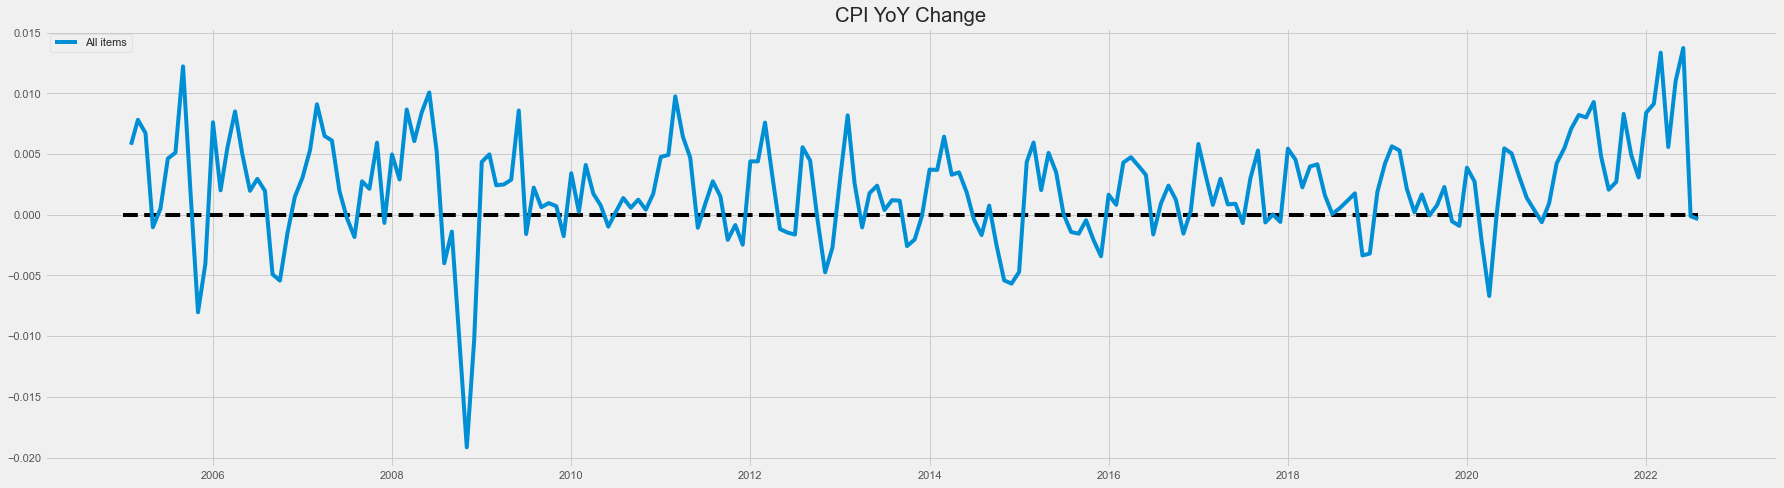

In [ ]:
pmap = cpi_df.sort_index()
pmap['All items'].pct_change()

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (25,7))
ax.plot(pmap.index, pmap['All items'].pct_change(), label = 'All items')
ax.hlines(y=0, xmin=pmap.index.min(), xmax=pmap.index.max(), color='black', linestyle='--')
ax.legend(loc="upper left",ncol = 4)
ax.set_title('CPI YoY Change')
plt.tight_layout()


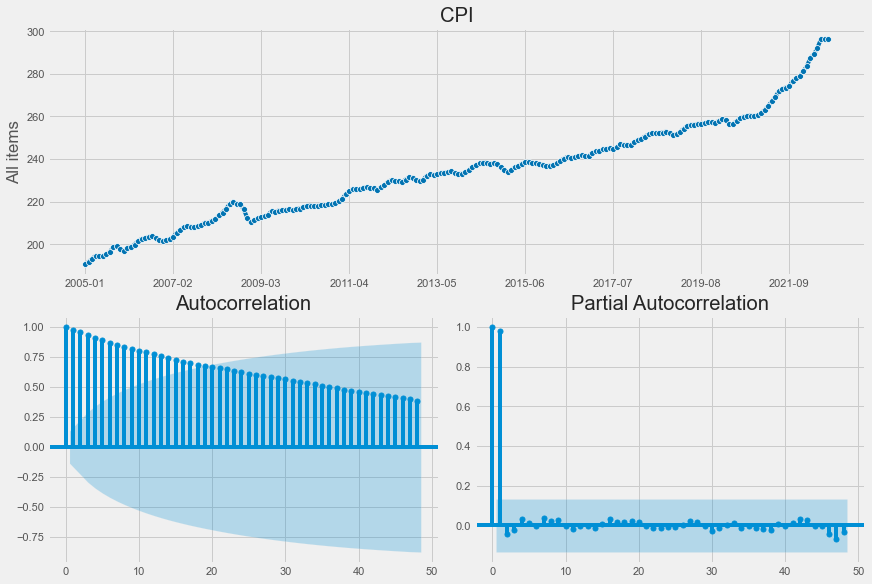

In [ ]:
from sktime.transformations.series.acf import AutoCorrelationTransformer
y = pmap['All items'].sort_index() 
y.index = pd.period_range(y.index.min(),y.index.max(), freq='M') # Convert Series to Period Index
transformer = AutoCorrelationTransformer(n_lags=12*4) # Create ACF transformer
y_hat  = transformer.fit_transform(y) # Get ACF values 

from sktime.utils.plotting import plot_lags, plot_correlations # Plot the Correlation Overview 
acf = plot_correlations(y, lags = 12*4, alpha = .05, series_title = 'CPI')